In [1]:
# 15/02/2023 <---- Started working on
# Author: Pushpraj Katiyar
# email: pk825@snu.edu.in <--- for any query, reach out to this email
# Roll no: 2220120001

# this notebook will solve the foollowing statment:
# 1. Take any grayscale image. Apply salt and pepper noise on it. Then apply : (a) Gaussian filter and (b) Median flter on it.
# 2. Take any grayscale image. Apply Sobel operator to obtain the sharpened image.
# 3. Take any two grayscale images. Then (a) take style from Image 1 and apply on image 2. (b) vice versa.

In [35]:
#import lib
import cv2
import numpy as np
from matplotlib import pyplot as plt

# getting some upcoming deprication warning due to installed python version. bit of non essencial code
import warnings
warnings.filterwarnings('ignore')

# Method which add salt and pepper noise on a grayscal image and return noisy image 

In [36]:
def add_saltpepper_noise(img):
    # Define noise parameters
    salt_vs_pepper = 0.2
    noise_amount = 0.05
#     noise_img = img
    # Calculate the number of salt and pepper pixels to add
    num_salt = np.ceil(noise_amount * img.size * salt_vs_pepper)
    num_pepper = np.ceil(noise_amount * img.size * (1. - salt_vs_pepper))

    # Add salt pixels
    salt_coords = [np.random.randint(0, dim - 1, int(num_salt))
                  for dim in noise_img.shape]
    noise_img[salt_coords] = 255

    # Add pepper pixels
    pepper_coords = [np.random.randint(0, dim - 1, int(num_pepper))
                    for dim in noise_img.shape]
    noise_img[pepper_coords] = 0
    return noise_img

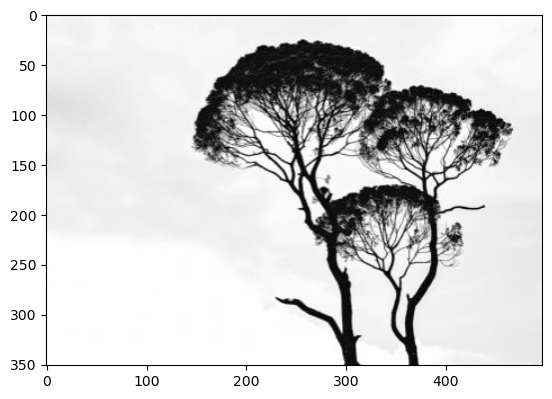

#### Image After Adding salt and pepper noise


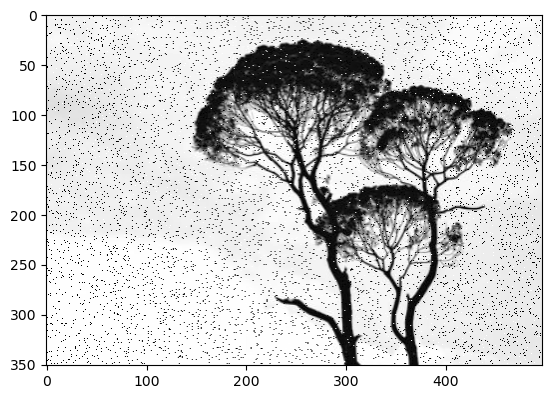

In [12]:
# salt-and-pepper noise can
# be applied only to grayscale images
# Reading the color image in grayscale image
img = cv2.imread('input/weThree.jpg', 0)

plt.imshow(img, cmap="gray")
plt.show()
noise_img =  add_saltpepper_noise(img)  
#Storing the image
cv2.imwrite('input/wethree-with-salt-and-pepper.jpg', noise_img)
#Show the image with matplotlib
print("#### Image After Adding salt and pepper noise")
plt.imshow(noise_img, cmap="gray")
plt.show()

## Applied Gaussian filter and Median flter on noisy image and showed their output image.

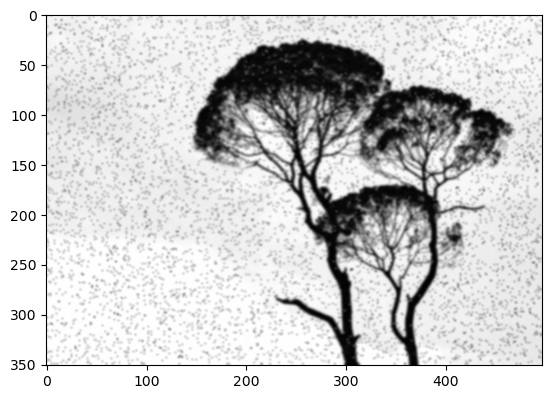

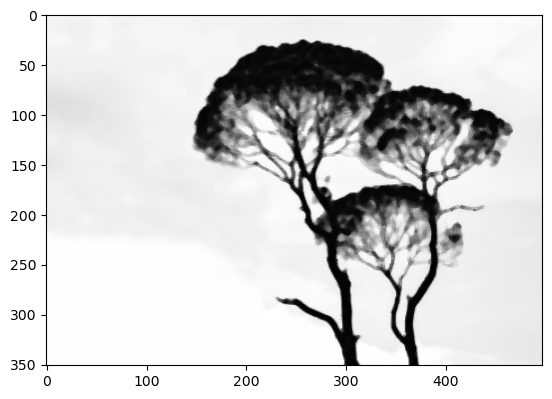

In [38]:
# Apply Gaussian filter to remove noise
denoised_img_gaussian = cv2.GaussianBlur(noise_img, (5, 5), 0)
plt.imshow(denoised_img_gaussian, cmap="gray")
plt.show()
# Apply Median filter to remove noise
denoised_img_median = cv2.medianBlur(noise_img, 5)
plt.imshow(denoised_img_median, cmap="gray")
plt.show()

## Appled Sobel operator on origin image to obtain the sharpened image

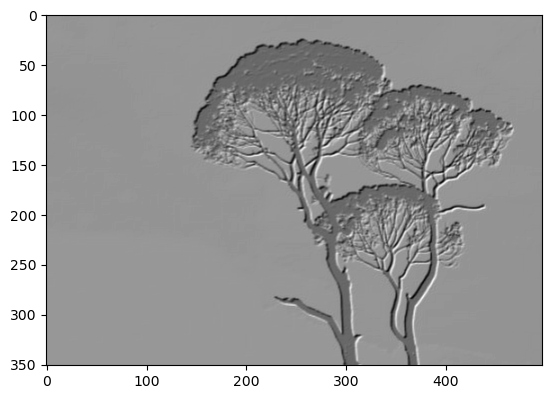

In [42]:
## Apply Sobel operator to obtain the sharpened image
img = cv2.imread('input/weThree.jpg', 0)
sobelx = cv2.Sobel(img, cv2.CV_64F, 1, 0, ksize=3)
sobely = cv2.Sobel(img, cv2.CV_64F, 0, 1, ksize=3)
sobel_img = cv2.addWeighted(sobelx, 0.5, sobely, 0.5, 0)

# Add the Sobel image to the original image to obtain the sharpened image
sharpened_img = cv2.addWeighted(img, 1, sobel_img, 1, 0, dtype=cv2.CV_64F)
plt.imshow(sharpened_img, cmap="gray")
plt.show()

## Take any two grayscale images. Then (a) take style from Image 1 and apply on image 2. (b) vice versa.


In [15]:
# import tenserflow libs
import tensorflow as tf
import tensorflow_hub as hub
import PIL.Image

In [16]:
# define all necessory methods 
def load_img(path_to_img):
  max_dim = 512
  img = tf.io.read_file(path_to_img)
  img = tf.image.decode_image(img, channels=3)
  img = tf.image.convert_image_dtype(img, tf.float32)

  shape = tf.cast(tf.shape(img)[:-1], tf.float32)
  long_dim = max(shape)
  scale = max_dim / long_dim

  new_shape = tf.cast(shape * scale, tf.int32)

  img = tf.image.resize(img, new_shape)
  img = img[tf.newaxis, :]
  return img

def imshow(image, title=None):
  if len(image.shape) > 3:
    image = tf.squeeze(image, axis=0)

  plt.imshow(image)
  if title:
    plt.title(title)

def tensor_to_image(tensor):
  tensor = tensor*255
  tensor = np.array(tensor, dtype=np.uint8)
  if np.ndim(tensor)>3:
    assert tensor.shape[0] == 1
    tensor = tensor[0]
  return PIL.Image.fromarray(tensor)

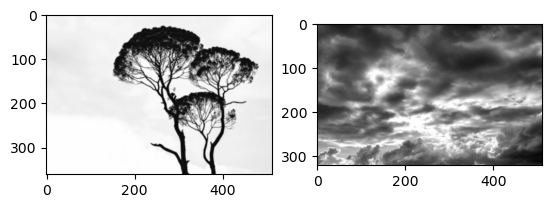

In [32]:
styled_image = load_img("input/weThree.jpg")
base_image = load_img("input/clowd.jpg")
plt.subplot(1,2,1)
imshow(styled_image)
# plt.show()
plt.subplot(1,2,2)
imshow(base_image)

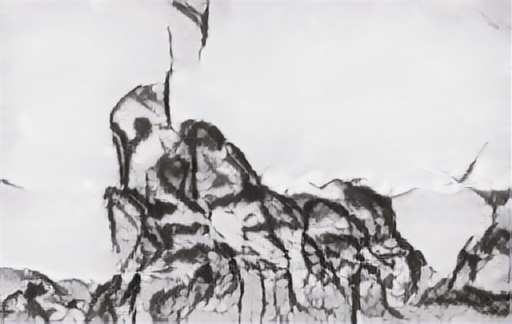

In [33]:
hub_module = hub.load('https://tfhub.dev/google/magenta/arbitrary-image-stylization-v1-256/2')
stylized_image = hub_module(tf.constant(base_image), tf.constant(styled_image))[0]
tensor_to_image(stylized_image)

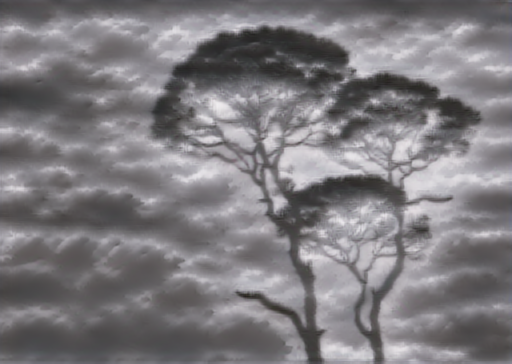

In [34]:
# vice- versa
stylized_image_vv = hub_module(tf.constant(styled_image), tf.constant(base_image))[0]
tensor_to_image(stylized_image_vv)

## Assignment completed #####